In [2]:
import pandas as pd

In [4]:
selected_pairs = pd.read_csv("selected_pairs.csv",index_col=0)

In [5]:
selected_pairs

,pair,pearson_corr
42171,"('UZD', 'UZE')",0.911760
42193,"('UZD', 'UZF')",0.900402
18429,"('MLM', 'VMC')",0.885454
20392,"('CMS', 'DTE')",0.876914
39663,"('MHO', 'KBH')",0.863259
32703,"('VLO', 'MPC')",0.858748
41241,"('ASB', 'FMBH')",0.858611
32710,"('VLO', 'PBF')",0.857222
41206,"('PFS', 'FMBH')",0.850813
41175,"('PFS', 'ASB')",0.848494


In [78]:
selected_pairs['pair']

42171      ('UZD', 'UZE')
42193      ('UZD', 'UZF')
18429      ('MLM', 'VMC')
20392      ('CMS', 'DTE')
39663      ('MHO', 'KBH')
32703      ('VLO', 'MPC')
41241     ('ASB', 'FMBH')
32710      ('VLO', 'PBF')
41206     ('PFS', 'FMBH')
41175      ('PFS', 'ASB')
14302     ('GOLD', 'AEM')
20410      ('CMS', 'WEC')
30782      ('TPH', 'CCS')
17355       ('ED', 'WEC')
24197     ('VIV', 'TIMB')
17329       ('ED', 'CMS')
20701      ('DTE', 'AEE')
32654      ('PSX', 'VLO')
15396    ('SOJD', 'SOJC')
20710      ('DTE', 'WEC')
42497     ('ARCH', 'HCC')
43267      ('DHT', 'FRO')
30826      ('TPH', 'BZH')
17901      ('AEM', 'AGI')
15293    ('SOJD', 'SOJE')
32060     ('DINO', 'PBF')
20971      ('AEE', 'WEC')
43226      ('MTDR', 'SM')
15504    ('SOJE', 'SOJC')
17337       ('ED', 'DTE')
32048     ('DINO', 'VLO')
20707      ('DTE', 'OGE')
43207    ('MTDR', 'VTLE')
19057      ('POR', 'OGE')
20401      ('CMS', 'AEE')
38008      ('EME', 'FIX')
28819     ('LCII', 'THO')
42902      ('AMR', 'HCC')
32659      (

# spreading trading strategy

In [8]:
# Implementing the spread trading strategy for a single pair
#Let's take a look at the spread for the first pair to make sure our calculations are going as expected. 
#Note that we keep track of whether we are on the firs/last day of the month as this is necessary for our trading strategy.

In [114]:
from datetime import datetime
import yfinance as yf
import ast

In [102]:
tm = yf.download("UZD", start="2023-12-25", end=datetime.today().strftime('%Y-%m-%d'))

[*********************100%***********************]  1 of 1 completed


In [62]:
tm

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,UZD,UZD,UZD,UZD,UZD,UZD
Date,,,,,,
2023-12-26 00:00:00+00:00,18.295372,19.299999,19.719999,19.270000,19.370001,60600
2023-12-27 00:00:00+00:00,18.503922,19.520000,19.760000,19.180000,19.400000,27600
2023-12-28 00:00:00+00:00,18.266933,19.270000,19.600000,19.129999,19.600000,32000
2023-12-29 00:00:00+00:00,18.437565,19.450001,19.799999,19.150000,19.250000,75900
2024-01-02 00:00:00+00:00,18.437565,19.450001,19.600000,19.280001,19.280001,29700
...,...,...,...,...,...,...
2024-10-31 00:00:00+00:00,23.469999,23.469999,23.690001,23.469999,23.690001,150400
2024-11-01 00:00:00+00:00,23.530001,23.530001,23.580000,23.450001,23.580000,22300


In [154]:
def get_prices_ticker(ticker, start_date, end_date):
    df = yf.download(ticker, start=start_date, end=end_date)
    return df

def first_last_day_of_month(df):
    if df.empty:
        print("DataFrame is empty! Skipping first/last day marking.")
        return df

    df['day'] = df.index.day
    df['day_diff_yesterday'] = (df['day'] - df['day'].shift(1))
    df['day_diff_tomorrow'] = (df['day'] - df['day'].shift(-1))
    df['first_day'] = df['day_diff_yesterday'] < 0
    df['last_day'] = df['day_diff_tomorrow'] > 0
    df.loc[df.index[-1], 'last_day'] = True
    df.loc[df.index[0], 'first_day'] = True
    return df

def estimate_m_day_returns(df, m_days):
    df['returns'] = np.log(df['Adj Close']/df['Adj Close'].shift(m_days))
    return df

def process_data(data, m_days=1):
    df = data.copy(deep=True)
    df['avg_dollar_vol'] = df['Close'] * df['Volume']
    df['N'] = df['avg_dollar_vol'].rolling(15).median()
    lst = ['Adj Close', 'N', 'returns', 'first_day', 'last_day']
    df = estimate_m_day_returns(df, m_days)
    df = first_last_day_of_month(df)
    return df[lst]

def make_spread_df(df_1, df_2, tickers):
    #change to higher liquidity equity 
    df_1['N2'] = df_2['N']
    spread = df_1['returns'] - df_2['returns']
    spread.name = 'spread'
    minimum_N = df_1[['N','N2']].min(axis=1)
    minimum_N.name = 'N'
    df_spread = pd.concat([spread, minimum_N], axis=1)
    df_spread[tickers[0]] = df_1['Adj Close']
    df_spread[tickers[1]] = df_2['Adj Close']
    df_spread['first_day'] = df_2['first_day']
    df_spread['last_day'] = df_2['last_day']
    return df_spread

def example_spread_calculation(selected_pairs):
    start_date = "2024-01-01"  
    end_date = datetime.today().strftime('%Y-%m-%d') 
    
    m_days = 1
    
    list_of_pairs = [ast.literal_eval(i) for i in list(selected_pairs['pair'])] #######
    
    df_1 = get_prices_ticker(list_of_pairs[0][0], start_date, end_date)
    df_2 = get_prices_ticker(list_of_pairs[0][1], start_date, end_date)
    
    df_1 = process_data(df_1, m_days)
    df_2 = process_data(df_2, m_days)
    
    df_spread = make_spread_df(df_1, df_2, list_of_pairs[0])
    return df_spread.dropna()

In [189]:
example_spread_calculation(selected_pairs)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,spread,N,UZD,UZE,first_day,last_day
Date,,,,,,
2024-01-23 00:00:00+00:00,-0.000641,401183.996582,18.854660,17.334831,False,False
2024-01-24 00:00:00+00:00,-0.003742,393312.500000,18.835703,17.382324,False,False
2024-01-25 00:00:00+00:00,0.003803,349529.985428,19.186441,17.638784,False,False
2024-01-26 00:00:00+00:00,-0.010828,393312.500000,19.214882,17.857250,False,False
2024-01-29 00:00:00+00:00,0.016885,401183.996582,19.594059,17.904745,False,False
...,...,...,...,...,...,...
2024-11-01 00:00:00+00:00,0.007004,679959.004593,23.530001,22.420000,True,False
2024-11-04 00:00:00+00:00,0.000636,646366.004181,23.650000,22.520000,False,False
2024-11-05 00:00:00+00:00,-0.001877,594870.019150,23.700001,22.610001,False,False


In [134]:
# Let's execute the strategy for the first pair:

In [156]:
list_of_pairs = [ast.literal_eval(i) for i in list(selected_pairs['pair'])]

In [157]:
list_of_pairs

[('UZD', 'UZE'),
 ('UZD', 'UZF'),
 ('MLM', 'VMC'),
 ('CMS', 'DTE'),
 ('MHO', 'KBH'),
 ('VLO', 'MPC'),
 ('ASB', 'FMBH'),
 ('VLO', 'PBF'),
 ('PFS', 'FMBH'),
 ('PFS', 'ASB'),
 ('GOLD', 'AEM'),
 ('CMS', 'WEC'),
 ('TPH', 'CCS'),
 ('ED', 'WEC'),
 ('VIV', 'TIMB'),
 ('ED', 'CMS'),
 ('DTE', 'AEE'),
 ('PSX', 'VLO'),
 ('SOJD', 'SOJC'),
 ('DTE', 'WEC'),
 ('ARCH', 'HCC'),
 ('DHT', 'FRO'),
 ('TPH', 'BZH'),
 ('AEM', 'AGI'),
 ('SOJD', 'SOJE'),
 ('DINO', 'PBF'),
 ('AEE', 'WEC'),
 ('MTDR', 'SM'),
 ('SOJE', 'SOJC'),
 ('ED', 'DTE'),
 ('DINO', 'VLO'),
 ('DTE', 'OGE'),
 ('MTDR', 'VTLE'),
 ('POR', 'OGE'),
 ('CMS', 'AEE'),
 ('EME', 'FIX'),
 ('LCII', 'THO'),
 ('AMR', 'HCC'),
 ('PSX', 'MPC'),
 ('AN', 'PAG'),
 ('NI', 'CMS'),
 ('NVT', 'ETN'),
 ('RIO', 'VALE'),
 ('AEE', 'OGE'),
 ('CMSD', 'CMSC'),
 ('NI', 'DTE'),
 ('MPC', 'PBF'),
 ('ED', 'AEE'),
 ('SOJD', 'ELC'),
 ('EIX', 'DTE')]

In [146]:
import matplotlib.pyplot as plt

In [158]:
class SpreadTrading:
    "A quantitative trading strategy"
    #
    def __init__(self, stop_loss, tickers):
        self.position_1 = [0]
        self.position_2 = [0]
        self.pnl = [0]
        self.e1_last = 0
        self.e2_last = 0
        self.position_profit_1 = 0
        self.position_profit_2 = 0
        self.can_trade = True
        self.stop_loss = stop_loss
        self.dates_traded = []
        self.dates_close_positions = []
        self.ticker_1 = tickers[0]
        self.ticker_2 = tickers[1]
        self.pair = tickers
        self.have_open_trades = [0]
        
    def open_trade(self, row, date):
        if row[self.ticker_1] > row[self.ticker_2]:
            self.position_1.append(-row['N']/1000)
            self.position_2.append(row['N']/1000)
        else:
            self.position_1.append(row['N']/1000)
            self.position_2.append(-row['N']/1000)
        
        self.can_trade = True
        self.update_pnl(row, date)
        self.add_date(date)
        self.have_open_trades.append(1)
    
    def do_not_trade(self, row, date, open_trades):
        self.position_1.append(self.position_1[-1])
        self.position_2.append(self.position_2[-1])
        self.update_pnl(row, date)
        self.check_stop_loss(row, date, open_trades)
        currently_trading = self.have_open_trades[-1]
        self.have_open_trades.append(currently_trading)
        
    def close_trade(self, row, date):
        self.update_pnl(row, date)
        self.position_1.append(0)
        self.position_2.append(0)
        self.position_profit_1 = 0
        self.position_profit_2 = 0
        self.add_close_date(date)
        self.have_open_trades.append(0)
        
    def update_pnl(self, row, date='None'):
        daily_profit_1 = (row[self.ticker_1] - self.e1_last) * self.position_1[-1]
        daily_profit_2 = ((row[self.ticker_2] - self.e2_last)) * self.position_2[-1]
        self.position_profit_1 += daily_profit_1
        self.position_profit_2 += daily_profit_2
        
        self.pnl.append(daily_profit_1+daily_profit_2)
        self.e1_last = row[self.ticker_1]
        self.e2_last = row[self.ticker_2]
        
    def check_stop_loss(self, row, date, open_trades):
        if not open_trades:
            return None
        if (self.position_profit_1 + self.position_profit_2) < - self.stop_loss * 2 * abs(self.position_1[-1]):
            self.position_1.append(0)
            self.position_2.append(0)
            self.position_profit_1 = 0
            self.position_profit_2 = 0
            self.can_trade = False
            self.add_close_date(date)
            
    def add_date(self, date):
        self.dates_traded.append(str(date))
        
    def add_close_date(self, date):
        self.dates_close_positions.append(str(date))

In [219]:
def get_max_capital(df1):
    return 2 * df1['N'].max() / 50

def execute_strategy(df_spread, stop_loss, g, j, pair):
    "Executes trading strategy for a given set of parameters"
    have_open_trades = False
    can_start_trading = False
    can_trade = True
    n = df_spread.shape[0]
    spread_trading = SpreadTrading(stop_loss, pair)

    for i in range(0,n):
        row = df_spread.iloc[i]
        if row['first_day']:
            can_start_trading = True
            can_trade = True
        
        if not can_start_trading:
            continue
            
        if have_open_trades:
            if row['last_day'] or abs(row['spread']) < j:
                spread_trading.close_trade(row, df_spread.index[i])
                have_open_trades = False
                continue
          
        elif (abs(row['spread']) > g) and can_trade:
            spread_trading.open_trade(row, df_spread.index[i])
            have_open_trades = True
            continue

        spread_trading.do_not_trade(row, df_spread.index[i], have_open_trades)
        can_trade = spread_trading.can_trade
        if not can_trade:
            have_open_trades = can_trade
    return (sum(spread_trading.pnl), spread_trading)

def plot_cumulative_pnl_example(spread_trading, pair):
    "Helper function to plot cumulative profits from trading strategy"
    new_list=[]
    j = 0
    n = len(spread_trading.pnl)
    for i in range(0, n):
        j+=spread_trading.pnl[i]
        new_list.append(j)

    plt.plot(new_list)
    plt.xlabel('Days since beggining of strategy')
    plt.ylabel('Accumulated profit & loss [$]')
    plt.title('Pair trading strategy for '+pair[0]+' - '+pair[1])
    plt.grid()
    


def trade_example_pair(pair):
    m_days = 1
    s_loss = 0.25
    g = 0.02
    j = 0.001

    start_date = "2024-01-01"  
    end_date = datetime.today().strftime('%Y-%m-%d') 
    
    df_1 = get_prices_ticker(pair[0], start_date, end_date)
    df_2 = get_prices_ticker(pair[1], start_date, end_date)
    
    df_1 = process_data(df_1, m_days)
    df_2 = process_data(df_2, m_days)
    
    df_spread = make_spread_df(df_1, df_2, pair)
    total_k = get_max_capital(df_spread)
    pnl = execute_strategy(df_spread, s_loss, g, j, pair)
    roi = ((pnl[0] + total_k) / total_k - 1)
    plot_cumulative_pnl(pnl[1], pair)
    return pnl, roi

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


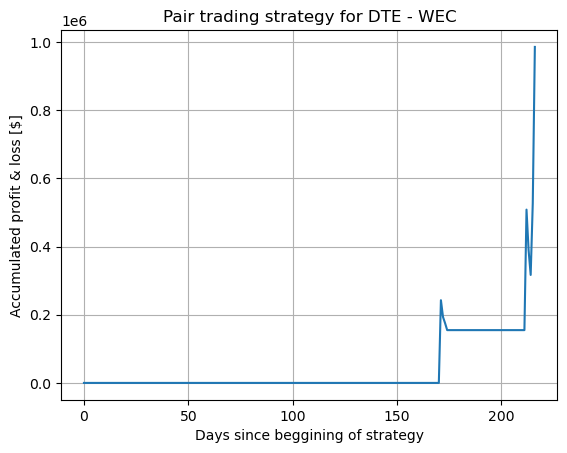

In [202]:
pnl, roi = trade_example_pair(list_of_pairs[19])

In [164]:
print('{:.01%}'.format(roi))

-0.1%


# Implementing the spread trading strategy for all pairs

In [204]:
# We are finally ready to apply our trading strategy to all pairs. 
# We do this by iterating through our list of 50 pairs, 
# keeping track of progress with a progress bar and saving all results. 


In [221]:

def trade_pair(pair, start_date, end_date, m_day, s_loss, g, j):
    start_date = "2024-01-01"  
    end_date = datetime.today().strftime('%Y-%m-%d') 
    df_1 = get_prices_ticker(pair[0], start_date, end_date)
    df_2 = get_prices_ticker(pair[1], start_date, end_date)

    df_1 = process_data(df_1, m_day)
    df_2 = process_data(df_2, m_day)
    
    df_spread = make_spread_df(df_1, df_2, pair)
    total_k = get_max_capital(df_spread)

    pnl = execute_strategy(df_spread, s_loss, g, j, pair)
    roi = ((pnl[0] + total_k) / total_k - 1) * 100
    
    return pnl, roi, total_k


In [214]:
def execute_strategy(df_spread, stop_loss, g, j, pair):
    "Executes trading strategy for a given set of parameters"
    have_open_trades = False
    can_start_trading = False
    can_trade = True
    n = df_spread.shape[0]
    spread_trading = SpreadTrading(stop_loss, pair)

    for i in range(0,n):
        row = df_spread.iloc[i]
        if row['first_day']:
            can_start_trading = True
            can_trade = True
        
        if not can_start_trading:
            continue
            
        if have_open_trades:
            if row['last_day'] or abs(row['spread']) < j:
                spread_trading.close_trade(row, df_spread.index[i])
                have_open_trades = False
                continue
          
        elif (abs(row['spread']) > g) and can_trade:
            spread_trading.open_trade(row, df_spread.index[i])
            have_open_trades = True
            continue

        spread_trading.do_not_trade(row, df_spread.index[i], have_open_trades)
        can_trade = spread_trading.can_trade
        if not can_trade:
            have_open_trades = can_trade
    return (sum(spread_trading.pnl), spread_trading)

In [215]:
def trade_all_pairs(list_of_pairs):
    results = []
    rois = []
    capital = []
    
    m_days = 1
    s_loss = 0.25
    g = 0.02
    j = 0.001
    
    for pair in tqdm(list_of_pairs):
        pnl, roi, k = trade_pair(pair, start_date, end_date, m_days, s_loss, g, j)
        results.append(pnl)
        rois.append(roi)
        capital.append(k)
        
    return results, rois, capital

In [220]:
def plot_cumulative_pnl(spread_trading, pair):
    "Helper function to plot cumulative profits from trading strategy"
    new_list=[]
    j = 0
    n = len(spread_trading.pnl)
    for i in range(0, n):
        j+=spread_trading.pnl[i]
        new_list.append(j)

    plt.plot(new_list)
    plt.xlabel('Days since beggining of strategy')
    plt.ylabel('Accumulated profit & loss [$]')
    plt.title('Pair trading strategy for '+pair[0]+' - '+pair[1])
    plt.grid()

In [216]:
def plot_all_pairs_pnl(results, pairs):
    number_of_trades = []
    for i, res in enumerate(results):
        plot_cumulative_pnl(res[1], pairs[i])
        plt.title('Pair trading all pairs')
        number_of_trades.append(len(res[1].dates_traded))
    return number_of_trades


In [211]:
from tqdm import tqdm

[*********************100%***********************]  1 of 1 completed00<?, ?it/s]
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed,  2.51it/s]
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed,  4.07it/s]
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed,  3.92it/s]
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed,  3.65it/s]
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed,  3.75it/s]
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed,  3.70it/s]
[******************

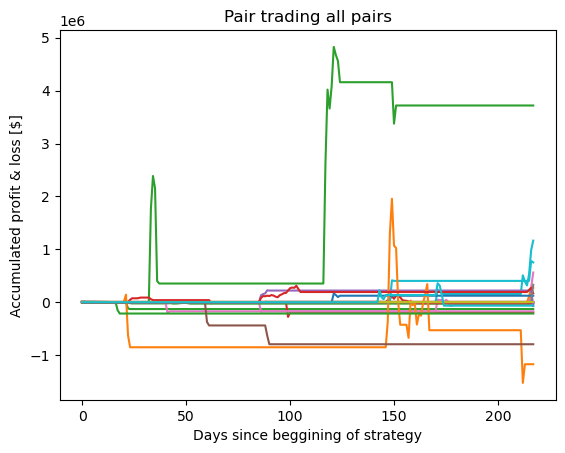

In [222]:
results, rois, capital = trade_all_pairs(list_of_pairs)
number_of_trades = plot_all_pairs_pnl(results,list_of_pairs)

In [223]:
print(sum(number_of_trades))

138


# Trading patterns and profit and loss

In [224]:
selected_pairs['times traded'] = number_of_trades
selected_pairs

,pair,pearson_corr,times traded
42171,"('UZD', 'UZE')",0.911760,1
42193,"('UZD', 'UZF')",0.900402,3
18429,"('MLM', 'VMC')",0.885454,3
20392,"('CMS', 'DTE')",0.876914,0
39663,"('MHO', 'KBH')",0.863259,5
32703,"('VLO', 'MPC')",0.858748,7
41241,"('ASB', 'FMBH')",0.858611,3
32710,"('VLO', 'PBF')",0.857222,4
41206,"('PFS', 'FMBH')",0.850813,7
41175,"('PFS', 'ASB')",0.848494,2


In [225]:
selected_pairs.describe()

,pearson_corr,times traded
count,50.000000,50.000000
mean,0.827339,2.760000
std,0.027746,2.615183
min,0.788957,0.000000
25%,0.806929,1.000000
50%,0.819776,2.000000
75%,0.839913,4.000000
max,0.911760,12.000000


In [227]:
def count_and_plot_open_trades(results, list_of_pairs):
    dct = {}
    for i, res in enumerate(results):
        dct[res[1].pair] = res[1].have_open_trades
        
    open_trades = pd.DataFrame(dct, columns=list_of_pairs)
    plt.plot(open_trades.sum(axis=1))
    plt.grid()
    plt.title('Trading pattern during backtesting')
    plt.xlabel('Days since beginning of strategy')
    plt.ylabel('Active number of spread positions')
    return open_trades

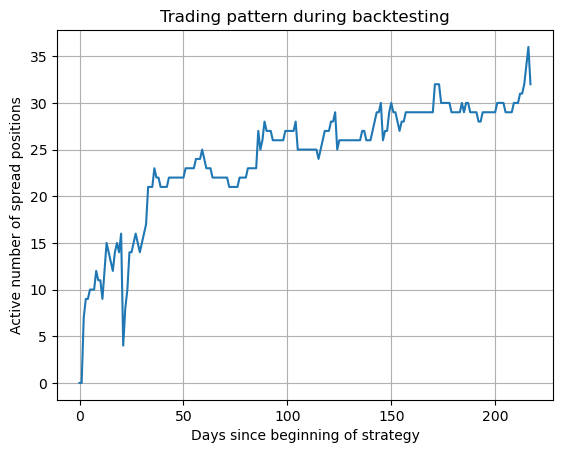

In [228]:
open_trades = count_and_plot_open_trades(results, list_of_pairs)

In [229]:
open_trades.sum(axis=1).mean()

24.146788990825687

In [230]:
def calculate_total_daily_pnl(results, list_of_pairs):
    dct = {}
    for res in results:
        dct[res[1].pair] = res[1].pnl
        
    total_pnl = pd.DataFrame(dct, columns=list_of_pairs)
    plt.plot(total_pnl.sum(axis=1))
    plt.grid()
    plt.title('Daily PnL during backtesting period')
    plt.xlabel('Days since beginning of strategy')
    plt.ylabel('Daily profit and loss [$]')  
    return total_pnl

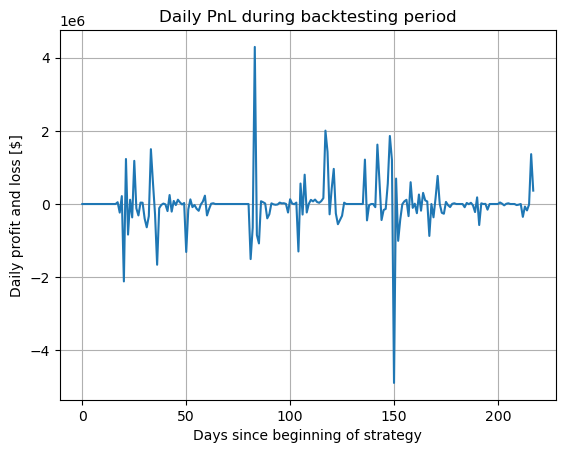

In [231]:
total_pnl = calculate_total_daily_pnl(results, list_of_pairs)

In [232]:
def get_aggregated_pnl(total_pnl):
    aggregated_pnl = total_pnl.sum(axis=1)
    n = len(aggregated_pnl)
    j = 0
    new_list = []
    for i in range(0, n):
        j+=aggregated_pnl[i]
        new_list.append(j)
    
    plt.plot(new_list)
    plt.xlabel('Days since beggining of strategy')
    plt.ylabel('Accumulated profit & loss')
    plt.title('Pair trading strategy for all pairs')
    plt.grid()

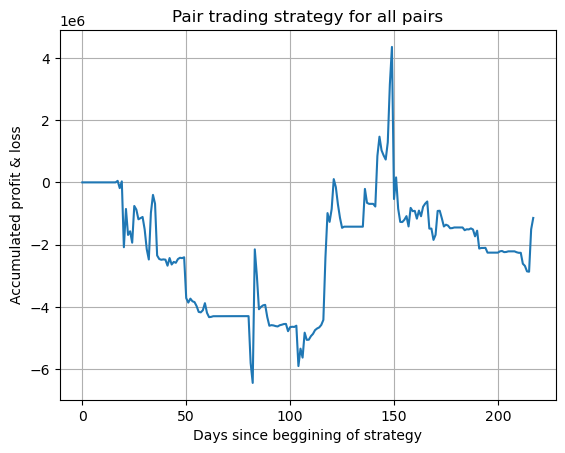

In [233]:
aggregated_pnl = get_aggregated_pnl(total_pnl)

In [238]:
total_pnl

,"(UZD, UZE)","(UZD, UZF)","(MLM, VMC)","(CMS, DTE)","(MHO, KBH)","(VLO, MPC)","(ASB, FMBH)","(VLO, PBF)","(PFS, FMBH)","(PFS, ASB)",...,"(NI, CMS)","(NVT, ETN)","(RIO, VALE)","(AEE, OGE)","(CMSD, CMSC)","(NI, DTE)","(MPC, PBF)","(ED, AEE)","(SOJD, ELC)","(EIX, DTE)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,NaN,-0.0,-0.0,...,0.0,-0.000000,-0.0,0.000000,-0.0,-0.0,NaN,0.000000,0.0,-0.0
3,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,NaN,0.0,0.0,...,0.0,0.000000,-0.0,0.000000,0.0,-0.0,NaN,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,NaN,0.0,0.0,...,0.0,0.000000,-0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,...,0.0,353410.609218,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
215,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,0.000000,-0.0,38140.750499,-0.0,-0.0,0.0,0.000000,-0.0,-0.0
216,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,0.000000,0.0,42499.210412,0.0,-0.0,-0.0,-0.000000,0.0,0.0
